In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "dataset/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

In [5]:
print(img_array)

[[ 21  21  21 ...  33  34  35]
 [ 24  24  24 ...  38  40  41]
 [ 25  25  25 ...  38  38  38]
 ...
 [123 123 125 ... 160 165 162]
 [123 123 124 ... 157 152 150]
 [122 122 124 ... 159 154 152]]


In [6]:
print(img_array.shape)

(482, 500)


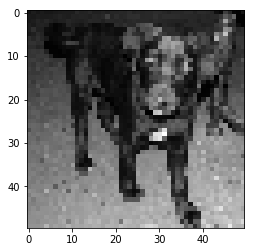

In [14]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [16]:
training_data = []

def creat_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
creat_training_data()
        

In [17]:
print (len(training_data))

24946


In [19]:
import random

random.shuffle(training_data)

In [21]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
0
0
1
1
1


In [22]:
X = []
y = []

In [23]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [24]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()